In [64]:
from distutils import extension
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
from matplotlib import colormaps #type: ignore

task = 'mnli'
epochs = 3
sd = 7

cmp = 'viridis'
sv = bool(0)
dpi = 300
transparent = False
ext = 'eps'

print(os.getcwd())
pth = f'c:/Ebooks/code/Research/Selft/{task}'
pth = os.path.join(os.getcwd(), pth)
if sv:
    Path(pth).mkdir(parents=True, exist_ok=True)
print(pth)

c:\Ebooks\code\BertFt
c:/Ebooks/code/Research/Selft/mnli


In [65]:
x_lim_loss = [0.8, epochs]
y_lim_loss = [0.19, 0.36]
x_lim_acc = [0.8, epochs]
y_lim_acc = [0.85, 0.95]

methods  = {
    "alpha_asc_False": ['Training Larger Alpha Layers First','large_alph'],
    "alpha_asc_True": ['Training Smaller Alpha Layers First','small_alph'],
    "layer_asc_False": ['Training Bottom Layers First','bottom_first'],
    "layer_asc_True": ['Training Top Layers First','top_first'],
    "layer_asc_rand": ['Training Random Layers', 'random'],
}

for key, value in methods.items():
    break
    plt.figure(figsize=(20, 3))
    first_val_loss = []
    first_val_acc = []

    layers = [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 18, 24, 30, 36, 72, 74]
    cmap = colormaps[cmp]
    # cmap =  get_cmap(cmp, len(layers)))

    for l_idx, layer in enumerate(layers):
        base_path = f"GLUE/trainseed_{sd}/task_{task}/lay_norm_False/{key}/layers_{layer}/lr2e-5_epoch3_bs32/"
        
        path = os.path.join(base_path, 'baseline.npy')
        
        alpha_vals = []
        for epoch in range (0, epochs, 1):
            csv_path = os.path.join(base_path, 'stats', f'epoch_{epoch}.csv')
            df = pd.read_csv(csv_path)
            alpha_vals.append(np.mean(df['alpha'][2:]))

        baseline = np.load(path, allow_pickle=True).item()
        first_val_loss.append(baseline['val_loss_base'])
        first_val_acc.append(baseline['val_acc_base'])
        
        plt.subplot(1, 5, 1)
        plt.plot(baseline['val_loss_base'], label=f'Layers={layer}', c=cmap(l_idx/len(layers)))
        plt.xlabel('Train Epochs')
        plt.title('Validation Loss')
        
        plt.subplot(1, 5, 2)
        plt.plot(baseline['val_loss_base'][:], label = f'Layers={layer}', c=cmap(l_idx/len(layers)))
        plt.xlim(x_lim_loss)
        plt.ylim(y_lim_loss)
        plt.title('Validation Loss (Zoomed)')
        
        plt.subplot(1, 5, 3)
        plt.plot(baseline['val_acc_base'], label=f'Layers={layer}', c=cmap(l_idx/len(layers)))
        plt.xlabel('Train Epochs')
        plt.title('Validation Accuracy')
        
        plt.subplot(1, 5, 4)
        plt.plot(baseline['val_acc_base'][:], label=f'Layers={layer}', c=cmap(l_idx/len(layers)))
        plt.xlim(x_lim_acc)
        plt.ylim(y_lim_acc)
        plt.title('Validation Accuracy (Zoomed)')
        
        plt.subplot(1, 5, 5)
        plt.plot(alpha_vals[:], label=f'Layers={layer}', c=cmap(l_idx/len(layers)))
        plt.xlabel('Train Epochs')
        plt.legend(bbox_to_anchor=(1, 1))
        plt.title('Alpha')
        
    plt.suptitle(f'{value[0]} ({task})', fontsize=12, y=1.1)
    if sv:
        plt.savefig(f'{pth}/{value[1]}.{ext}', format=ext, transparent=transparent, dpi=dpi, bbox_inches='tight')

In [66]:
dictionary = {
    "alpha_asc_False": {"first_val_loss": [], "first_val_acc": [], "alpha_vals": []},
    # "alpha_asc_True": {"first_val_loss": [], "first_val_acc": [], "alpha_vals": []},
    "layer_asc_False": {"first_val_loss": [], "first_val_acc": [], "alpha_vals": []},
    # "layer_asc_True": {"first_val_loss": [], "first_val_acc": [], "alpha_vals": []},
    "layer_asc_rand": {"first_val_loss": [], "first_val_acc": [], "alpha_vals": []},
}


for key in dictionary:
    layers = [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 18, 24, 30, 36, 72, 74]
    cmap = colormaps[cmp]

    for l_idx, layer in enumerate(layers):
        base_path = (
            f"GLUE/trainseed_{sd}/task_{task}/lay_norm_False/{key}/layers_{layer}/lr2e-5_epoch3_bs32/"
        )
        path = os.path.join(base_path, "baseline.npy")

        alpha_vals = []
        for epoch in range(0, epochs, 1):
            stats_path = os.path.join(base_path, "stats", f"epoch_{epoch}.csv")
            df = pd.read_csv(stats_path)
            layers_path = os.path.join(base_path, "stats", f"freeze_{epoch}.csv")
            frozen = pd.read_csv(layers_path)
            frozen = frozen[frozen['freeze_layer'] == 'False']
            layer_list = frozen['name'].tolist()
            filtered = df[df['longname'].isin(layer_list)]
            alpha_vals.append(np.max(df["alpha"][:]))
            # alpha_vals.append(np.mean(df["alpha"][2:]))

        baseline = np.load(path, allow_pickle=True).item()
        dictionary[key]["first_val_loss"].append(baseline["val_loss_base"])
        dictionary[key]["first_val_acc"].append(baseline["val_acc_base"])
        dictionary[key]["alpha_vals"].append(alpha_vals)

    dictionary[key]["first_val_loss"] = np.array(dictionary[key]["first_val_loss"])  # type: ignore
    dictionary[key]["first_val_acc"] = np.array(dictionary[key]["first_val_acc"])  # type: ignore
    dictionary[key]["alpha_vals"] = np.array(dictionary[key]["alpha_vals"])  # type: ignore

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


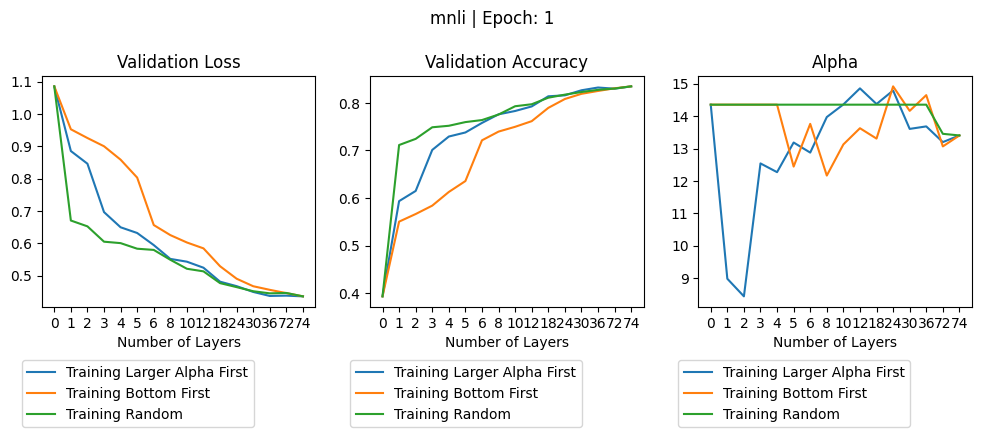

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


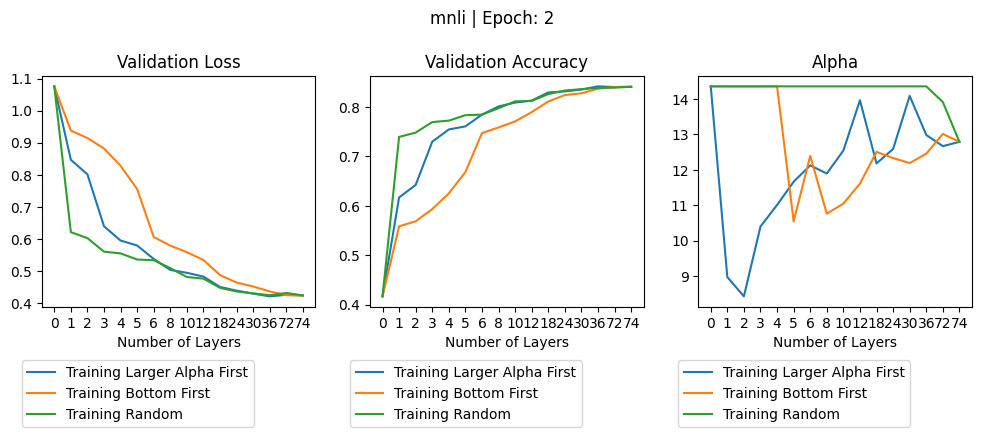

In [67]:
methods = {
    "alpha_asc_False": "Training Larger Alpha First",
    "alpha_asc_True": "Training Smaller Alpha First",
    "layer_asc_False": "Training Bottom First",
    "layer_asc_True": "Training Top First",
    "layer_asc_rand": "Training Random",
}

layer_cnt = len(layers)
marker_size = 2
show_marker = False
marker = 'o' if show_marker else None

for i in range(1, epochs, 1):
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 3, 1)
    for key in dictionary:
        plt.plot(
            range(layer_cnt), dictionary[key]["first_val_loss"][:, i], # type: ignore
            markersize = marker_size,
            marker = marker,
            label=methods[key]
        )
    plt.xticks(range(layer_cnt), layers)
    plt.legend(bbox_to_anchor=(0.8, -0.2))
    plt.xlabel('Number of Layers')
    plt.title('Validation Loss')
    
    plt.subplot(1, 3, 2)
    for key in dictionary:
        plt.plot(
            range(layer_cnt), dictionary[key]["first_val_acc"][:, i], # type: ignore
            markersize = marker_size,
            marker = marker,
            label=methods[key]
        )
    plt.xticks(range(layer_cnt), layers)
    plt.xlabel('Number of Layers')
    plt.title('Validation Accuracy')
    plt.legend(bbox_to_anchor=(0.8, -0.2))
    
    plt.subplot(1, 3, 3)
    for key in dictionary:
        plt.plot(
            range(layer_cnt), dictionary[key]["alpha_vals"][:, i], # type: ignore
            markersize = marker_size,
            marker = marker,
            label=methods[key]
        )
    plt.xticks(range(layer_cnt), layers)
    plt.xlabel('Number of Layers')
    plt.title('Alpha')
    plt.legend(bbox_to_anchor=(0.8, -0.2))
    
    plt.suptitle(f'{task} | Epoch: {i}', y=1.1)
    
    if sv:
        plt.savefig(f'{pth}/ep{i}.{ext}', format=ext,transparent=transparent, dpi=dpi, bbox_inches='tight')
    plt.show()